In [20]:
%matplotlib notebook

import numpy as np

%matplotlib inline


# to load classes utilizing numba's jit
# compilation optimizations, load the following
# modules. The following lines would load modules
# with routines for creation of spin 1/2 (hard-core
# bosonic) hamiltonians
from ham1d.models import spin1d as sp1

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rc('text', usetex=True)

#first, define the chain length. We choose a rather small system here:
L=12
# define constants and model parameters:
J=1.




## Defining the Hamiltonian and instantiating it

Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
Calculating nnz, o_nnz, d_nnz!
Calculating nnz, o_nnz, d_nnz finished!
Number of degeneracies: 863.
Number of unique values: 489.
Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
Calculating nnz, o_nnz, d_nnz!
Calculating nnz, o_nnz, d_nnz finished!
Number of degeneracies: 918.
Number of unique values: 49.
Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
Calculating nnz, o_nnz, d_nnz!
Calculating nnz, o_nnz, d_nnz finished!
Number of degeneracies: 887.
Number of unique values: 374.
Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
Calculating nnz, o_nnz, d_nnz!
Calculating nnz, o_nnz, d_nnz finished!
Number of degeneracies: 874.
Number of unique values: 455.
Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
Calculating nnz, o_nnz, d_nnz!
Calculating nnz, o_nnz, d_nnz finished!
Number of degeneracies: 8

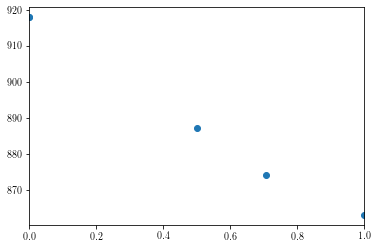

In [38]:
deglist = []
deltalist = []
for l_ in range(1,3):
    for m_ in range(1,5):
        J_pm = [[J * 0.5 , i, (i + 1)%L] for i in range(L)] # the %L part ensures PBC

        # the first entry in the nested list is always the value of the exchange constant
        # the following entries are integers specifying the sites on which the operators act.

        # then, specify the operators:
        flip_left = ['+-', J_pm]

        flip_right = ['-+', J_pm] #couplings remain the same, only the operator order changes

        # interaction:
        J_zz = [[J*np.cos(np.pi*l_/m_), i, (i+1)%L] for i in range(L)]
        inter = ['zz', J_zz]

        # we can now put together the static_list -> just a list of hamiltonian term
        # definitions

        static_list = [flip_left, flip_right, inter]

        ham = sp1.hamiltonian(L, static_list, [], Nu=int(L/2.))

        # obtain both symmetry operators -> for the parity and particle-hole symmetry
        parity_ = ham.parity_shuffle()
        part_hole_ = ham.particle_hole_shuffle()
        # get the eigensystem
        eigvals, eigvecs = ham.eigsystem()

        # count the degeneracies
        u, c = np.unique(np.around(eigvals, decimals=12), return_counts=True)
        # sum all the values with multiplicities greater than 1
        degs = np.sum(c[c > 1])
        # number of unique values
        n_unique = len(u)

        print(f'Number of degeneracies: {degs}.')
        print(f'Number of unique values: {n_unique}.')

        multiplicities=[]

        for c_ in c:
            multiplicities += [c_ for i in range(c_)]

        multiplicities = np.array(multiplicities)

        deglist.append(degs)
        deltalist.append(np.cos(np.pi*l_/m_))

fig = plt.figure()

plt.plot(deltalist, deglist, 'o')
plt.xlim(0,1)

plt.show()

### Instantiating the Hamiltonian

In [22]:
ham = sp1.hamiltonian(L, static_list, [], Nu=int(L/2.))

# obtain both symmetry operators -> for the parity and particle-hole symmetry
parity_ = ham.parity_shuffle()
part_hole_ = ham.particle_hole_shuffle()
# get the eigensystem
eigvals, eigvecs = ham.eigsystem()

Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
Calculating nnz, o_nnz, d_nnz!
Calculating nnz, o_nnz, d_nnz finished!


### Count the degeneracies

In [26]:
# count the degeneracies
u, c = np.unique(np.around(eigvals, decimals=12), return_counts=True)
# sum all the values with multiplicities greater than 1
degs = np.sum(c[c > 1])
# number of unique values
n_unique = len(u)

print(f'Number of degeneracies: {degs}.')
print(f'Number of unique values: {n_unique}.')

multiplicities=[]

for c_ in c:
    multiplicities += [c_ for i in range(c_)]

multiplicities = np.array(multiplicities)
# get nondegenerate states

Number of degeneracies: 24.
Number of unique values: 912.


In [28]:
np.arange(1,5,1)

array([1, 2, 3, 4])